In [35]:
print("Hello")
import mglearn
import warnings
warnings.filterwarnings('ignore')

Hello


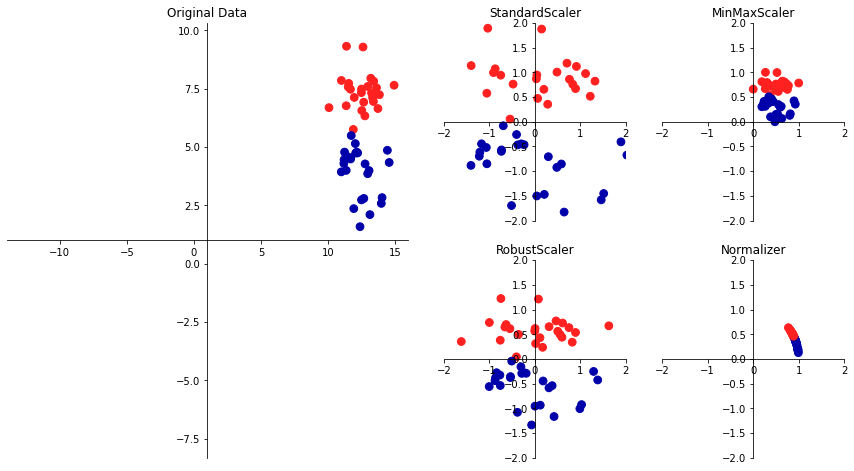

In [4]:
mglearn.plots.plot_scaling()

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [9]:
cancer = load_breast_cancer()

In [10]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler()

In [15]:
X_train_scaled = scaler.transform(X_train)

In [24]:
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print('{}'.format(X_train_scaled.min(axis=0)))
print(X_train_scaled.max(axis=0))

[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
[2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [26]:
from sklearn.datasets import make_blobs

In [28]:
X,_ =  make_blobs(n_samples=50,centers=4,random_state=2,cluster_std=2)

In [29]:
X_train,X_test = train_test_split(X,random_state=4,test_size=0.1)

In [30]:
import matplotlib.pyplot as plt

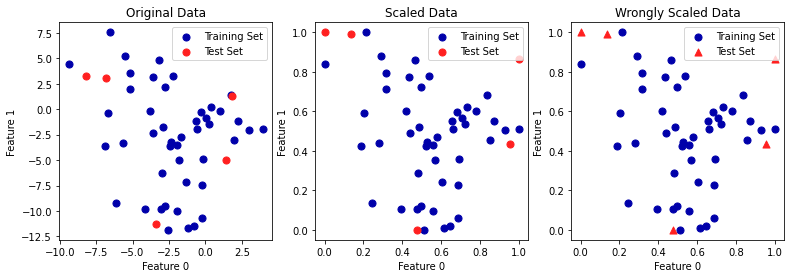

In [42]:
fig, axes = plt.subplots(1,3,figsize=(13,4))

axes[0].scatter(X_train[:,0],X_train[:,1],color=mglearn.cm2(0),s=50,label='Training Set')
axes[0].scatter(X_test[:,0],X_test[:,1],color=mglearn.cm2(1),s=50,label='Test Set')
axes[0].legend()
axes[0].set_title('Original Data')

scale = MinMaxScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled =  scale.fit_transform(X_test)


axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],color=mglearn.cm2(0),s=50,label='Training Set')
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],color=mglearn.cm2(1),s=50,label='Test Set')
axes[1].legend()
axes[1].set_title('Scaled Data')


t_scale = MinMaxScaler()
X_test_scaled_ =  t_scale.fit_transform(X_test)


axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],color=mglearn.cm2(0),s=50,label='Training Set')
axes[2].scatter(X_test_scaled_[:,0],X_test_scaled_[:,1],marker='^',color=mglearn.cm2(1),s=50,label='Test Set')
axes[2].legend()
axes[2].set_title('Wrongly Scaled Data')


for ax in axes:
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')


In [44]:
from sklearn.svm import SVC

In [46]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,test_size=0.3,random_state=0)

In [60]:
svc = SVC(C=100)
svc.fit(X_train,y_train)

SVC(C=100)

In [61]:
print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))

0.9346733668341709
0.9532163742690059


In [64]:
X_train_scaled =  scale.fit_transform(X_train)
scale.fit(X_train)
X_test_scaled = scale.transform(X_test)

In [65]:
svc.fit(X_train_scaled,y_train)
print(svc.score(X_train_scaled,y_train))
print(svc.score(X_test_scaled,y_test))

1.0
0.9707602339181286


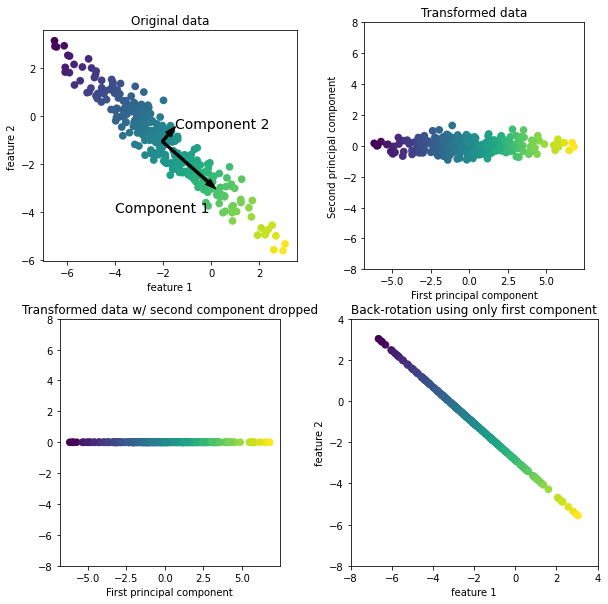

In [67]:
mglearn.plots.plot_pca_illustration()

In [70]:
print(cancer.get('DESCR'))

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

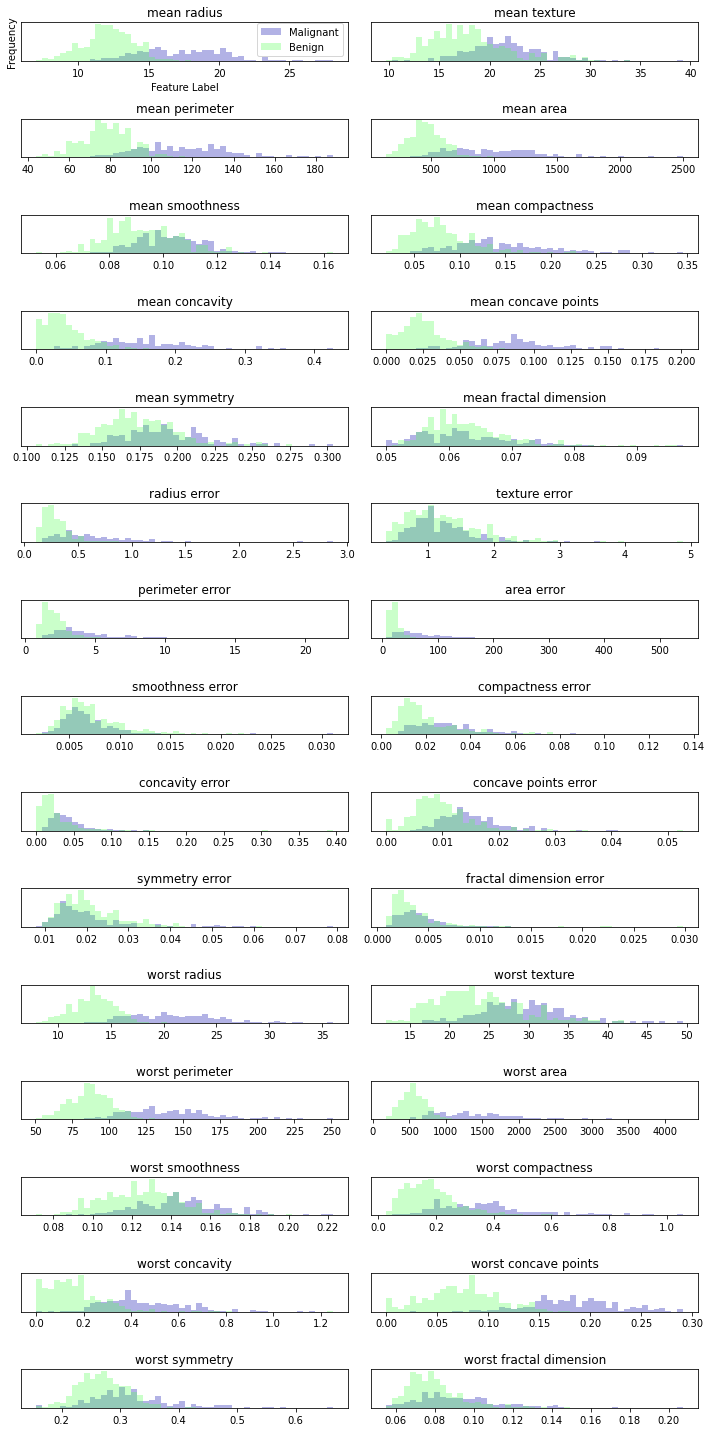

In [80]:
import numpy as np
fig, axes = plt.subplots(15,2,figsize = (10,20))

malignant = cancer.data[cancer.target ==0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _,bins = np.histogram(cancer.data[:,i],bins = 50)
    ax[i].hist(malignant[:,i],bins=bins,color = mglearn.cm3(0),alpha=0.3)
    ax[i].hist(benign[:,i],bins=bins,color = mglearn.cm3(2),alpha=0.3)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('Feature Label')
ax[0].set_ylabel('Frequency')
ax[0].legend(['Malignant','Benign'],loc='best')
fig.tight_layout()

In [82]:
from sklearn.preprocessing import StandardScaler

In [84]:
scale = StandardScaler()
scale.fit(cancer.data)
X_scaled = scale.transform(cancer.data)

In [86]:
from sklearn.decomposition import PCA

In [87]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

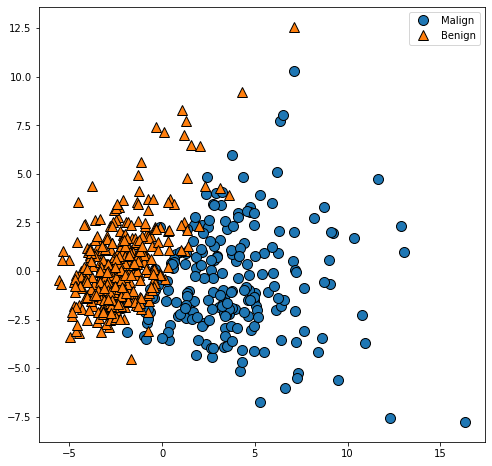

In [91]:
plt.figure(figsize=(8,8))

mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(['Malign','Benign'],loc='best')

Text(0, 0.5, '')

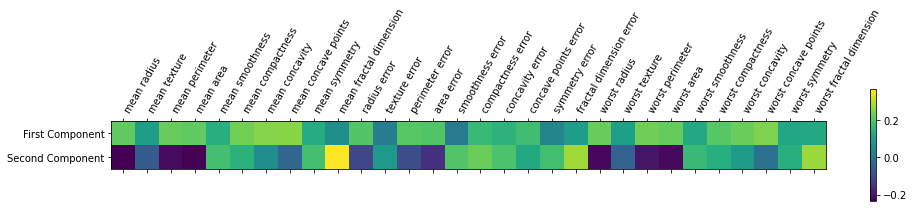

In [95]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['First Component','Second Component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha='left')
plt.xlabel('')
plt.ylabel('')